# 3장 - 모델 만들기와 예측

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 타이타닉 호 데이터셋

Pandas 라이브러리를 사용하여 타이타닉 호 생존자 데이터셋을 가져온다.

In [2]:
import pandas
data = pandas.read_csv("data/titanic.csv")
data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 데이터의 훈련/테스트 분할 비율을 80/20%로 한다. 
data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

### 데이터 준비하기

In [1]:
# 2장에서 작성한 범주형에서 수치형으로 변환하는 함수를
# 자동으로 열 이름을 추가하도록 변경했다. 
def cat_to_num(data):
    categories = unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)

In [5]:
def prepare_data(data):
    """
        기초 데이터의 데이터 프레임을 가져와서 머신러닝 모델 특성으로 반환한다. 
    """
    
    # 처음에는 활용할 수 있는 수치형 값만 사용해서 모델을 만든다. 
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # 누락된 나이 값은 -1로 설정한다.
    features["Age"] = data["Age"].fillna(-1)
    
    # 운임을 제곱근한 특성을 추가한다.
    features["sqrt_Fare"] = sqrt(data["Fare"])
    
    # 성별 범주형 값을 추가한다. 
    features = features.join( cat_to_num(data['Sex']) )
    
    # 승선지 벙주형 값을 추가한다.
    features = features.join( cat_to_num(data['Embarked']) )
    
    return features

### Scikit-Learn을 이용하여 로지스틱 회기 분류기를 만들기 

In [6]:
#cat_to_num(data['Sex'])
features = prepare_data(data_train)
features[:5]

,Pclass,Age,SibSp,Parch,sqrt_Fare,Sex=female,Sex=male,Embarked=C,Embarked=Q,Embarked=S,Embarked=nan
0,3,22.0,1,0,2.692582,0,1,0,0,1,0
1,1,38.0,1,0,8.442944,1,0,1,0,0,0
2,3,26.0,0,0,2.815138,1,0,0,0,1,0
3,1,35.0,1,0,7.286975,1,0,0,0,1,0
4,3,35.0,0,0,2.837252,0,1,0,0,1,0


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(features, data_train["Survived"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# 예측하기
model.predict(prepare_data(data_test))

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [9]:
# 테스트 데이터에 대한 모델의 정확도
# (이는 4장에서 더 자세히 살펴볼 것이다.)
model.score(prepare_data(data_test), data_test["Survived"])

0.82681564245810057

### 서포트 벡터 머신을 사용한 비선형 모델

In [10]:
from sklearn.svm import SVC
model = SVC()
model.fit(features, data_train["Survived"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
model.score(prepare_data(data_test), data_test["Survived"])

0.86033519553072624

### 여러 계급으로 분류하기: 손 글씨 숫자

널리 알려진 비선형 다중 계급 k-최근접 이웃 알고리즘을 사용하여 MNIST 데이터셋에 있는 손 글씨 숫자들을 예측한다. 

In [12]:
mnist = pandas.read_csv("data/mnist_small.csv")
mnist_train = mnist[:int(0.8*len(mnist))]
mnist_test = mnist[int(0.8*len(mnist)):]

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(mnist_train.drop("label", axis=1), mnist_train['label'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [14]:
preds = knn.predict_proba(mnist_test.drop("label", axis=1))
pandas.DataFrame(preds[:5], index=["Digit %d"%(i+1) for i in range(5)])

,0,1,2,3,4,5,6,7,8,9
Digit 1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Digit 2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Digit 3,0.3,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.1,0.0
Digit 4,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.4
Digit 5,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.3


In [15]:
knn.score(mnist_test.drop("label", axis=1), mnist_test['label'])

0.81999999999999995

### 회귀 모델을 이용하여 수치형 값 예측하기

선형 회귀 알고리즘을 사용하여 다양한 자동차의 갤런 당 마일을 예측합니다.

In [16]:
auto = pandas.read_csv("data/auto-mpg.csv")

# 원산지를 벙주형 변수로 변환한다. 
auto = auto.join(cat_to_num(auto['origin']))
auto = auto.drop('origin', axis=1)

# 훈련/테스트셋으로 분할한다. 
auto_train = auto[:int(0.8*len(auto))]
auto_test = auto[int(0.8*len(auto)):]

auto[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin=1,origin=2,origin=3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(auto_train.drop('mpg', axis=1), auto_train["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
pred_mpg = reg.predict(auto_test.drop('mpg',axis=1))

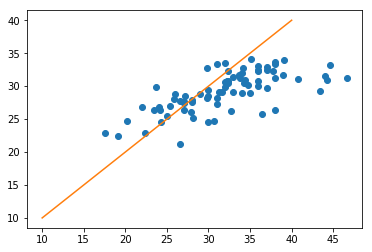

In [19]:
plot(auto_test.mpg, pred_mpg, 'o')
x = linspace(10,40,5)
plot(x, x, '-');